In [ ]:
import pandas as pd
from google.colab import files
import io

# อัปโหลดไฟล์
uploaded = files.upload()

# โหลดไฟล์เข้า DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

# แสดงผล
df.head()
print(df.columns)


# EDA & Preprocessing

In [ ]:
# Import Libraries สำหรับ Data Processing
import pandas as pd
import numpy as np

# Import Libraries สำหรับการทำ Visualization
import matplotlib.pyplot as plt

# Import Tools สำหรับ Train-Test Split และ Data Preprocessing
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import Machine Learning Models (Decision Tree & Random Forest)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Metrics สำหรับประเมินประสิทธิภาพของโมเดล
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    roc_auc_score, roc_curve,
    classification_report
)


In [ ]:
# โหลดชุดข้อมูล
df = pd.read_csv("Customer-Churn-Records.csv")

# แสดงข้อมูล 5 แถวแรก
df.head()

# ตรวจสอบข้อมูลเบื้องต้น
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

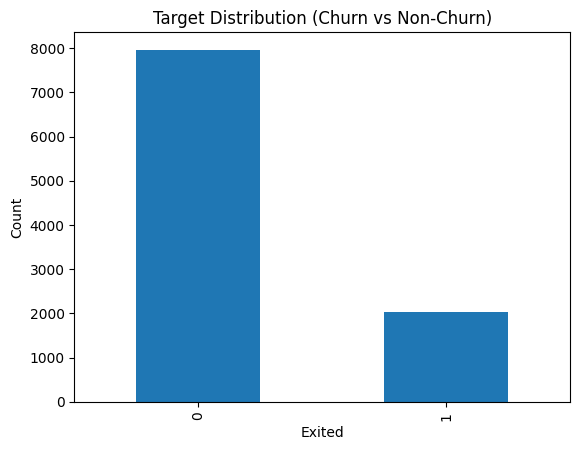

In [ ]:
# ดูการกระจายของ Target (Exited)
df["Exited"].value_counts().plot(kind="bar")

plt.title("Target Distribution (Churn vs Non-Churn)")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()


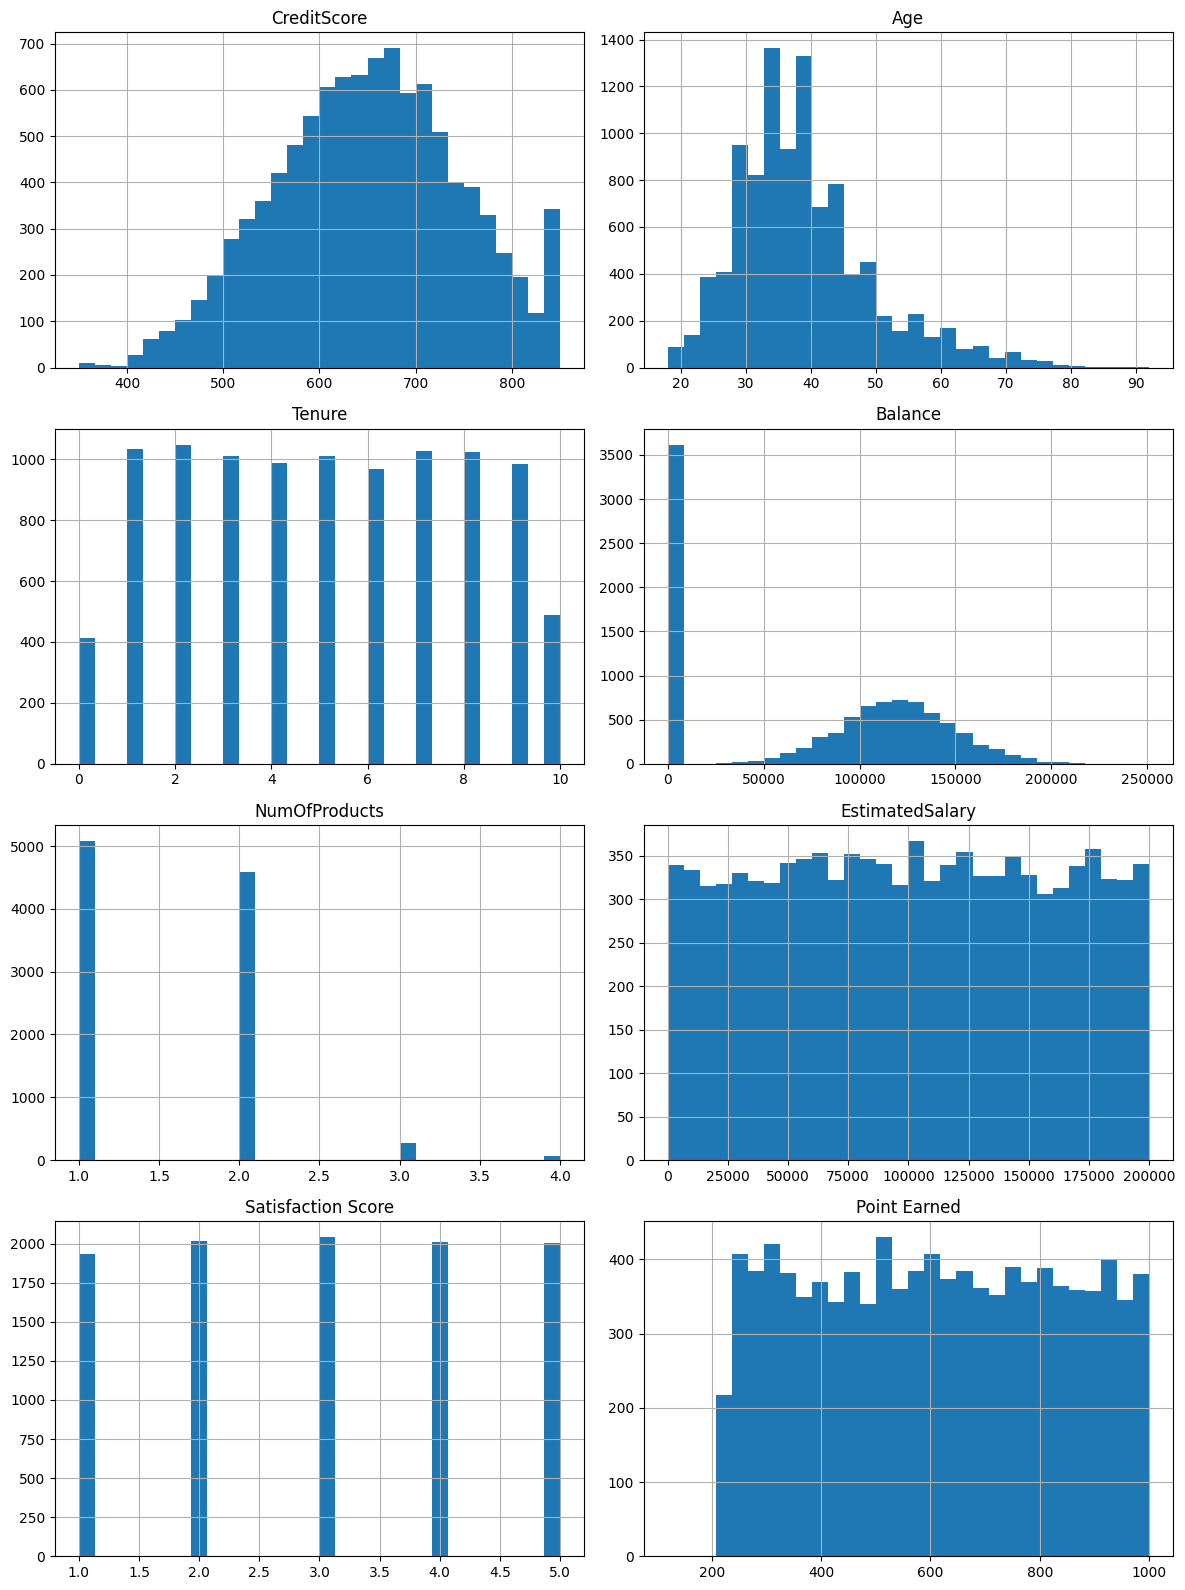

In [ ]:
# เลือกคอลัมน์ตัวเลขสำหรับดูการกระจายตัว
num_cols = [
    "CreditScore", "Age", "Tenure", "Balance",
    "NumOfProducts", "EstimatedSalary",
    "Satisfaction Score", "Point Earned"
]

# สร้าง Histogram ของตัวแปรเชิงตัวเลข
plt.figure(figsize=(12, 16))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    df[col].hist(bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
# แยก Features และ Target
X = df.drop("Exited", axis=1)
y = df["Exited"]

# แบ่งข้อมูล Train/Test (คงสัดส่วนคลาสด้วย stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
# แยกคอลัมน์ตัวเลขและตัวแปรเชิงหมวดหมู่
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

# สร้างชุด Preprocessing (Scaling สำหรับตัวเลข + One-Hot Encoding สำหรับตัวอักษร)
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)


# Modeling

In [ ]:
# สร้างโมเดล Decision Tree ด้วย Pipeline
dt_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(
        max_depth=5,
        min_samples_leaf=20,
        random_state=42
    ))
])

# ฝึกโมเดล Decision Tree
dt_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score', 'Point Earned'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Surname', 'Geography', 'Gender', 'Card Type'], dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=20,
                                        random_state=42))])

In [ ]:
# สร้างโมเดล Random Forest ด้วย Pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=200,
        max_depth=5,
        min_samples_leaf=20,
        random_state=42,
        n_jobs=-1
    ))
])

# ฝึกโมเดล Random Forest
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score', 'Point Earned'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Surname', 'Geography', 'Gender', 'Card Type'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=20,
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

# Evaluation

In [ ]:
# ฟังก์ชันประเมินผลโมเดล
def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model"):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # ความน่าจะเป็นสำหรับคำนวณ ROC-AUC
    y_test_proba = model.predict_proba(X_test)[:, 1]

    print(f"===== {name} =====")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Test Accuracy :", accuracy_score(y_test, y_test_pred))
    print("ROC-AUC       :", roc_auc_score(y_test, y_test_proba))
    print("\nClassification Report (Test)")
    print(classification_report(y_test, y_test_pred))

    return y_test_proba

# ประเมินโมเดล Decision Tree
dt_proba = evaluate_model(
    dt_pipeline,
    X_train, X_test,
    y_train, y_test,
    name="Decision Tree"
)

# ประเมินโมเดล Random Forest
rf_proba = evaluate_model(
    rf_pipeline,
    X_train, X_test,
    y_train, y_test,
    name="Random Forest"
)


===== Decision Tree =====
Train Accuracy: 0.998625
Test Accuracy : 0.9985
ROC-AUC       : 0.9975189981771603

Classification Report (Test)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

===== Random Forest =====
Train Accuracy: 0.79625
Test Accuracy : 0.796
ROC-AUC       : 0.9625979160508424

Classification Report (Test)
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1592
           1       0.00      0.00      0.00       408

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# เปรียบเทียบผล

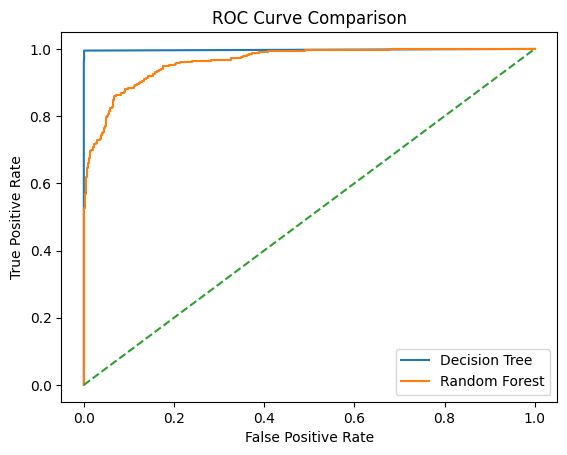

In [ ]:
# คำนวณค่า FPR และ TPR สำหรับ ROC Curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)

# วาดกราฟ ROC Curve เพื่อเปรียบเทียบโมเดล
plt.figure()
plt.plot(dt_fpr, dt_tpr, label="Decision Tree")
plt.plot(rf_fpr, rf_tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")  # baseline

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [ ]:
# ทดสอบความเสถียรของโมเดลด้วย Stratified Shuffle Split
def stability_test(pipeline, X, y):
    scores = []
    sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

    for train_idx, test_idx in sss.split(X, y):
        X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
        y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

        pipeline.fit(X_tr, y_tr)
        y_proba = pipeline.predict_proba(X_te)[:, 1]
        scores.append(roc_auc_score(y_te, y_proba))

    return np.mean(scores), np.std(scores)


In [ ]:
# ทดสอบความเสถียรของโมเดลทั้งสอง
dt_mean, dt_std = stability_test(dt_pipeline, X, y)
rf_mean, rf_std = stability_test(rf_pipeline, X, y)

# แสดงผลความเสถียร (ค่าเฉลี่ยและส่วนเบี่ยงเบน)
print("Decision Tree  - Mean ROC-AUC:", dt_mean, "Std:", dt_std)
print("Random Forest  - Mean ROC-AUC:", rf_mean, "Std:", rf_std)


Decision Tree  - Mean ROC-AUC: 0.9991025901566657 Std: 0.0008780735356602879
Random Forest  - Mean ROC-AUC: 0.9931124679771408 Std: 0.011479998555278181


# Interpretation / Discussion

In [ ]:
print("""

1. จากผลการทดลองพบว่า Random Forest ให้ค่า ROC-AUC เฉลี่ยสูงกว่า Decision Tree แสดงถึงความสามารถในการแยกลูกค้าที่มีแนวโน้ม churn ได้ดีกว่า
2. Decision Tree มีค่า Train score สูงกว่า Test score อย่างชัดเจน สะท้อนถึงปัญหา overfitting
3. Random Forest มี train–test gap ต่ำกว่า แสดงถึงความสามารถในการ generalize ที่ดีกว่า
4. ผลการทำ Stability Test พบว่า ค่า standard deviation ของ Random Forest ต่ำกว่า Decision Tree
5. สิ่งนี้ยืนยันว่า Bagging ช่วยลด variance และเพิ่มความเสถียรของโมเดล
6. Feature ที่มีความสำคัญ เช่น Age, IsActiveMember และ Balance สะท้อนพฤติกรรมลูกค้าที่มีผลต่อการ churn
7. ดังนั้น Random Forest จึงเหมาะสมกว่าสำหรับงาน Customer Churn Prediction ทั้งในเชิงประสิทธิภาพและความน่าเชื่อถือของโมเดล

""")



1. จากผลการทดลองพบว่า Random Forest ให้ค่า ROC-AUC เฉลี่ยสูงกว่า Decision Tree แสดงถึงความสามารถในการแยกลูกค้าที่มีแนวโน้ม churn ได้ดีกว่า
2. Decision Tree มีค่า Train score สูงกว่า Test score อย่างชัดเจน สะท้อนถึงปัญหา overfitting
3. Random Forest มี train–test gap ต่ำกว่า แสดงถึงความสามารถในการ generalize ที่ดีกว่า
4. ผลการทำ Stability Test พบว่า ค่า standard deviation ของ Random Forest ต่ำกว่า Decision Tree
5. สิ่งนี้ยืนยันว่า Bagging ช่วยลด variance และเพิ่มความเสถียรของโมเดล
6. Feature ที่มีความสำคัญ เช่น Age, IsActiveMember และ Balance สะท้อนพฤติกรรมลูกค้าที่มีผลต่อการ churn
7. ดังนั้น Random Forest จึงเหมาะสมกว่าสำหรับงาน Customer Churn Prediction ทั้งในเชิงประสิทธิภาพและความน่าเชื่อถือของโมเดล


